# Von Luca

16/50 matched; average opinions: 3.335


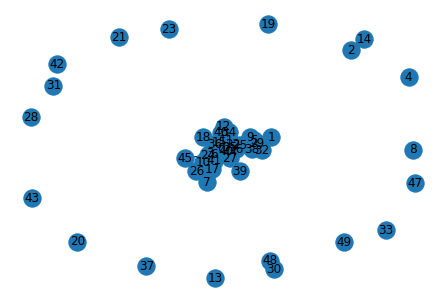

In [2]:
import networkx as nx
import random
import itertools
import matplotlib.pyplot as plt
import math
%matplotlib inline

n_users = 50
n_questions = 5
p_dontcare = 0.333
min_disagreements = 2

def n_disagreements(a, b):
    count = 0
    if len(a) == len(b):
        for i,j in zip(a,b):
            if i+j == 1:
                count += 1
        return(count)
    return -1

def almost_random(p_dontcare):
    chance = random.random()
    if chance <= p_dontcare:
        rand = -1
    elif chance > (1-(1-p_dontcare)/2):
        rand = 0
    else:
        rand = 1
    return(rand)

def create_question_arrays(n_users, n_questions, p_dontcare):
    arrays = [[almost_random(p_dontcare) for j in range (n_questions)] for i in range(n_users)]
    return arrays


def simulate_user_numbers(n_users, n_questions, p_dontcare):
    arrays = create_question_arrays(n_users, n_questions, p_dontcare)
    G = nx.Graph()
    G.add_nodes_from(list(range(n_users)))
    for i, j in itertools.combinations(range(n_users), 2):
        disagreements = n_disagreements(arrays[i],arrays[j])
        if disagreements > min_disagreements:
            G.add_edge(j,i, weight=math.log(disagreements))
    matching = nx.max_weight_matching(G)
    print(str(len(matching)) + "/" + str(n_users) + " matched; average opinions: " + str(round(n_questions*(1-p_dontcare),3)))
    nx.draw(G, with_labels=True)
    
simulate_user_numbers(n_users, n_questions, p_dontcare)